# Social Network Analysis

In [ ]:
#Import of required libraries and packages
import easygui
from matplotlib import pyplot as plt
import numpy as np
import scipy
import statistics
import pandas as pd
import networkx as nx
import nxviz as nv
import igraph as ig
import powerlaw 
from networkx.algorithms import bipartite
from scipy.stats.kde import gaussian_kde
from numpy import linspace
from scipy.stats import spearmanr
from nxviz import CircosPlot
from nxviz import ArcPlot 


%matplotlib inline

In [ ]:
#Import in networkx without weight and time
G_nx=nx.read_weighted_edgelist('voles.txt')

In [ ]:
#Import in igraph without weights and times
#Creating and empty Graph object
graph = ig.Graph()
G_ig = ig.Graph.Read_Ncol('voles.txt', directed=False)
G_ig.is_weighted()

In [ ]:
#Import the graph with the attributes weight and timestamp
G = nx.read_edgelist("file_name.txt",
nodetype = int, data=[('weight',int),('time',int)])
#check if all the nodes
G.nodes()





# Global and Local measures

In [ ]:
#measures with networkx
#global clustering coef
trans=nx.transitivity(G)
#local clustering coef
local_clustering=nx.average_clustering(G)
#density
den=nx.density(G)
#Assortativity
assortativity=nx.degree_assortativity_coefficient(G)
#Preferential attachment
pre_att = nx.preferential_attachment(G)
#pagerank
page=nx.pagerank(G)
#degree centrality
degree= nx.degree_centrality(G)
#betweenness centraily
betwn= nx.betweenness_centrality(G)

In [ ]:
#Average path length
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
for g in connected_component_subgraphs(G):
  print(nx.average_shortest_path_length(g)) 

In [ ]:
#diameter
for g in connected_component_subgraphs(G):
  print(nx.diameter(g)) 

In [ ]:
#measures with igraph
degree_ig = G_ig.degree()
betw_ig = G_ig.betweenness()
apl_ig = G_ig.average_path_length()
cls_ig = G_ig.closeness
pgrnk_ig = G_ig.pagerank()
clcof_ig = G_ig.transitivity_undirected()

In [ ]:
#Histogram Pagerank
plt.hist(pgrnk_ig)
plt.ylabel('Count')
plt.xlabel('Pagerank')
plt.plot
plt.savefig('page.png')

In [ ]:
#Degree Histogram
degree_ig=G_ig.degree()
plt.hist(degree_ig, bins=41)
plt.ylabel('Count')
plt.xlabel('Degree')
plt.plot
plt.savefig('degree.png')

In [ ]:
# More advanced plot of the betweenness distribtion by using the probability density
# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel 
kde = gaussian_kde(betw_ig)
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(betw_ig), max(betw_ig), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.ylabel('Density')
plt.xlabel('Betweenness')
plt.savefig('betw.png')

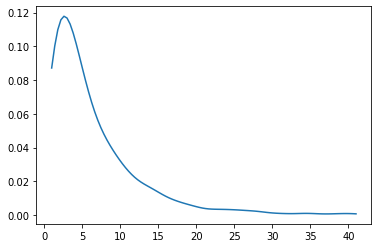

In [ ]:
# More advanced plot of the degree distribtion by using the probability density
# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel 
kde = gaussian_kde(degree_ig)
# these are the values over wich your kernel will be evaluated
dist_space = linspace( min(degree_ig), max(degree_ig), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )

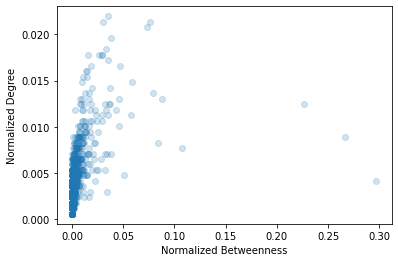

In [ ]:
# Compute the betweenness centrality of G: bet_cen
bet_cen = nx.betweenness_centrality(G)

# Compute the degree centrality of G: deg_cen
deg_cen = nx.degree_centrality(G)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()), alpha=0.2)
plt.ylabel('Normalized Degree')
plt.xlabel('Normalized Betweenness')
plt.savefig('corr.png')
# Display the plot
plt.show()

In [ ]:
# Calculation of Spearman Rank Correlations (variables are very skewed)
cor_db=spearmanr(degree, betw )[0]
cor_dp=spearmanr(degree, pgrnk )[0]
cor_bp=spearmanr(betw, pgrnk )[0]

print("Spearman correlation between degree and betweenness = {:.2f}".format(cor_db))
print("Spearman correlation between degree and page rank = {:.2f}".format(cor_dp))
print("Spearman correlation between betweenness and page rank = {:.2f}".format(cor_bp))

Spearman correlation between degree and betweenness = 0.81
Spearman correlation between degree and page rank = 0.89
Spearman correlation between betweenness and page rank = 0.81


In [ ]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) 
fit = powerlaw.Fit(degree_sequence, xmin=1)
R, p = fit.distribution_compare( 'stretched_exponential', 'power_law', normalized_ratio=True)
print (R, p)
plt.figure(figsize=(10, 6))
fit.distribution_compare('power_law', 'stretched_exponential',normalized_ratio=True)
fig4 = fit.plot_ccdf(linewidth=3, color='black', label='Degree Distribution of Network')
fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--', label='Powerlaw Distribution') #powerlaw
fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--', label='Lognormal Distribution') #lognormal
fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--', label='Streched Exponential Distribution') #stretched_exponential
plt.legend()
plt.ylabel('Sample Quantiles')
plt.xlabel('Theoretical Quantiles')
plt.savefig('degree_dist.png')

# Visualizations

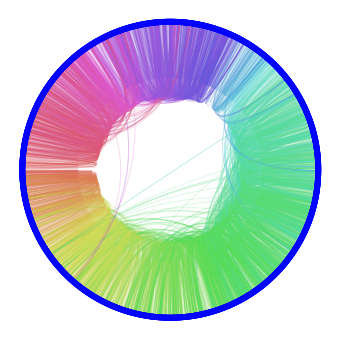

In [ ]:
c = CircosPlot(G, edge_color='time')

# Draw c to the screen
c.draw()
plt.savefig('CircosPlot.png')

# Display the plot
plt.show()

In [ ]:
# Create the un-customized ArcPlot object: a
a = ArcPlot(G, edge_color='time')

# Draw a to the screen
a.draw()
plt.savefig('ArcPlot.png')


# Display the plot
plt.show()

In [ ]:
nx.draw(G, pos=nx.spring_layout(G), node_size=0.1, width=0.1)
plt.savefig('spring.png')


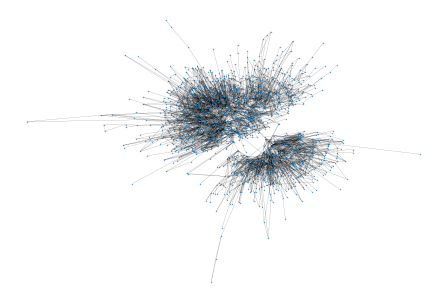

In [ ]:
nx.draw(G, pos=nx.kamada_kawai_layout(G, weight='weight'), node_size=0.1, width=0.1)
plt.savefig('kamada.png')

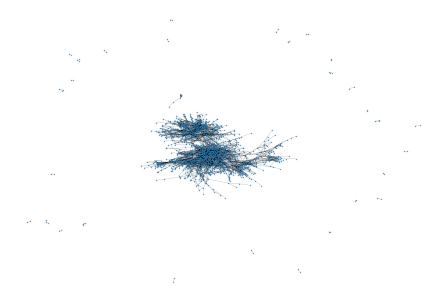

In [ ]:
nx.draw(G, pos=nx.fruchterman_reingold_layout(G), node_size=0.1, width=0.1)
plt.savefig('frucht.png')

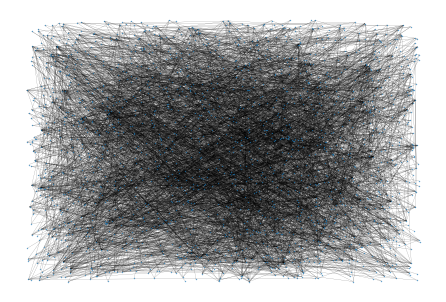

In [ ]:
nx.draw(G, pos=nx.random_layout(G), node_size=0.1, width=0.1)
plt.savefig('random.png')

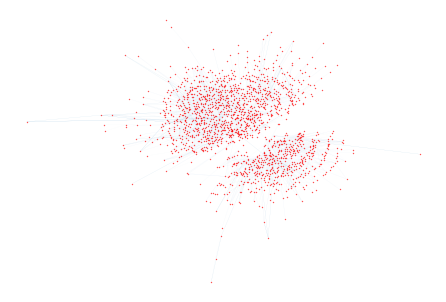

In [ ]:
#Plot with weights adjusted
edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, node_color='r', edgelist=edges, edge_color=weights, width=0.1, node_size=0.1,edge_cmap=plt.cm.Blues)
plt.savefig('edges.png')